# Aprendizaje automático
## Carlos Andres Giraldo Osorio

In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt 
import seaborn as sn 
#import tensorflow as tf

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder, StandardScaler #z = (x - u) / s
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

## 1. Analisis descriptivo de datos 

In [15]:
df_base=pd.read_csv("data.csv")
display(df_base.head(5))

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
df_base.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
liked                 int64
dtype: object

Todos los datos pertenecen a variables numéricas. Aun así, las columnas "mode" y "liked" se refieren al modo de la pista (mayor o menor) y a si la persona le dio like o no a una canción, las cuales, aunque estan llenas con unos y ceros, son variables categóricas de 2 opciones cada una.

In [4]:
display(df_base.describe())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


Los registros parecen estar completos por el count, además según la descripción de cada columna, todas estas pueden llegar a tener valor de 0 por lo que no esta mal que hayan campos con este valor. 

Resalta la columna "loudness" por tener valores negativos, esta columna se refiere al volumen general de una pista en decibeles (dB), los decibeles siguen una función logarítmica por lo que si es posible tener valores negativos.

Todas las columnas parecen tener buena cantidad de datos fiables y parecen ser importantes, por lo tanto se concluye que ninguna variable se debería eliminar por el momento.

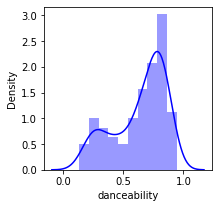

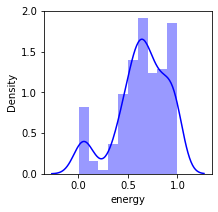

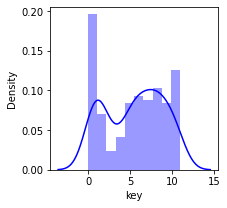

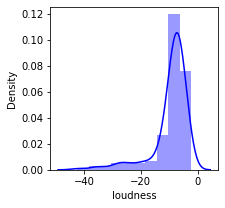

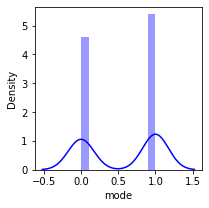

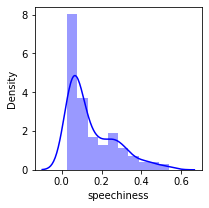

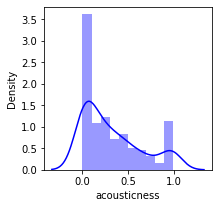

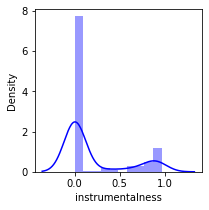

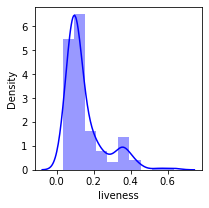

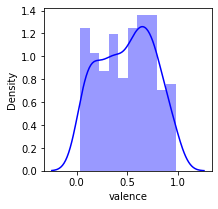

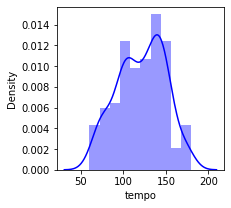

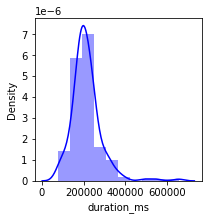

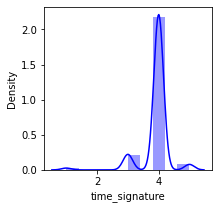

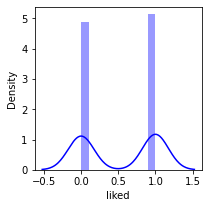

In [6]:
plt.figure(figsize=(3, 3))
sn.distplot(df_base['danceability'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['energy'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['key'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['loudness'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['mode'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['speechiness'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['acousticness'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['instrumentalness'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['liveness'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['valence'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['tempo'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['duration_ms'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['time_signature'], color='b', bins=10, hist_kws={'alpha': 0.4});

plt.figure(figsize=(3, 3))
sn.distplot(df_base['liked'], color='b', bins=10, hist_kws={'alpha': 0.4});

La mayoría de las variables parecen seguir una distribución bimodal, es decir, presentan dos picos o dos modas a lo largo de los valores. Algunas variables como 'loudness' y 'duration_ms' parecen conservar una distribución normal. Las variables 'liked' y 'mode' por su parte presentan una distribución binomial debido a que solo presentan dos valores cada una.

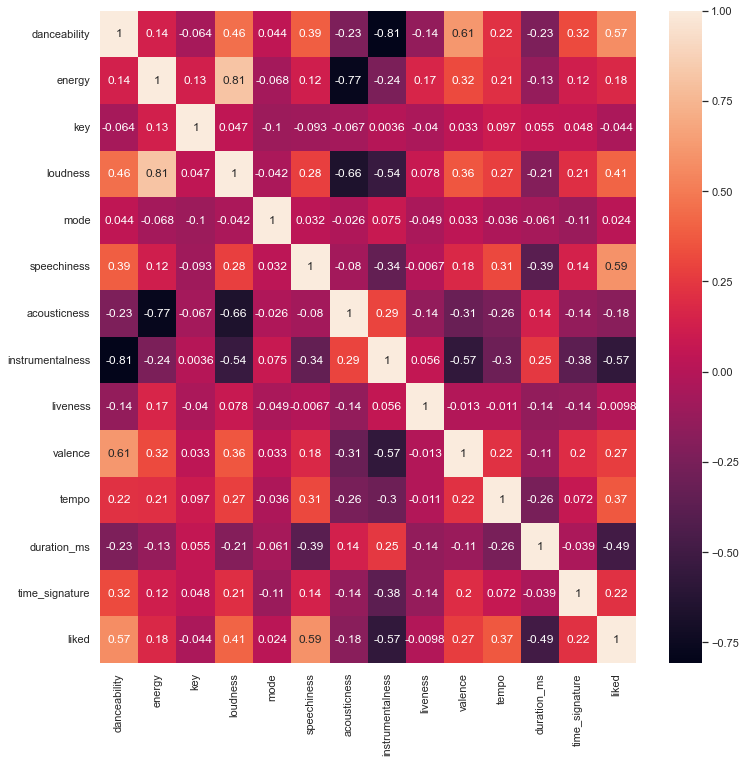

In [7]:
matriz_correlacion=df_base.corr()
sn.set(rc={'figure.figsize':(12,12)})
sn.heatmap(matriz_correlacion, annot=True)
plt.show()

Las variables con correlacion más alta son "loudness" con "energy", aunque presentan una correlación de 0.81, son variables que no representan lo mismo, una pista podría tener un volumen promedio alto pero ser tranquila, por esta razón una no podría suplir a la otra. Seguidas de estas se encuentran 'valance' y 'danceability', cuya correlacion es igual a 0.61 lo cuál es un valor mucho mas bajo y no es suficiente para definir que una variable pueda suplir la otra. 

Por otro lado tambien podemos ver correlaciones negativas, es decir, que son inversamente proporcinales, dentro de las cuales destacan "danceability" con "instrumentalness" y "accousticness" con "energy", estos pares de variables tambien se refieren a conceptos diferentes.

Con respecto a la variable objetivo 'liked' se puede observar que la variable 'liveness' tiene una correlación tan cercana a 0 que probablemente poco influya en la decisión de la persona al dar me gusta, por este motivo, esta variable si es candidata a ser eliminada.

In [16]:
df_base_depurada = df_base.drop(columns = 'liveness')
df_base_depurada

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.4130,110.547,190239,5,1


Se elimina la columna 'liveness' por su baja correlación con la variable objetivo.

In [8]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=1234)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

Se define la función para graficar exactitudes a lo largo de los datos.

## Normalización

In [17]:
sc = StandardScaler()
df_base_depurada[['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'valence','tempo','duration_ms','time_signature']] = sc.fit_transform(df_base_depurada[['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'valence','tempo','duration_ms','time_signature']])

Se hace un proceso de normalización de los valores para evitar que algunos valores tengan más peso de decisión que otros.

In [18]:
df_base_depurada

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,liked
0,0.769903,-0.055628,0.441095,0.417562,0,-0.843078,0.412263,-0.554830,0.503237,-0.896670,1.266065,0.193658,0
1,0.580139,0.248888,1.321780,0.235180,0,1.307549,-0.353462,-0.556955,0.095009,1.079610,0.469229,0.193658,1
2,-1.738685,-2.403485,-1.320274,-2.772810,1,-0.891369,2.103110,2.040507,-1.705687,-1.634621,1.022384,0.193658,0
3,0.395003,0.376091,-0.733151,0.382222,0,-0.753156,0.349755,-0.556952,0.330957,-1.114714,-0.062375,0.193658,1
4,0.695849,-0.256069,-1.320274,0.302018,1,0.608158,-0.544112,-0.556955,0.574396,1.214835,-0.472381,0.193658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,0,-0.807276,2.053103,1.281828,-1.313189,1.982307,-0.095723,-2.027708,0
191,1.042978,-0.055628,-0.733151,-0.330095,1,-0.769808,-0.937289,-0.556512,1.454520,0.136003,0.567357,0.193658,0
192,-0.637128,-1.107943,1.028218,-0.311504,0,-0.867223,1.974968,-0.556667,0.458295,-1.086013,0.313172,0.193658,0
193,-0.289998,0.349108,1.321780,0.559841,0,-0.436765,-0.870405,-0.556943,-0.301983,-0.376228,-0.321952,2.415023,1


### División de datos en entrenamiento y testing

In [19]:
x = df_base_depurada.drop(columns = 'liked')
y = df_base_depurada['liked']

X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## SVM

In [20]:
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

In [21]:
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 91.52542372881356%


array([[28,  3],
       [ 2, 26]], dtype=int64)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.90      0.93      0.91        28

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.92        59
weighted avg       0.92      0.92      0.92        59



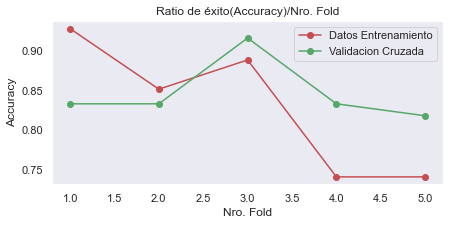

In [23]:
graficar_accuracy_scores(modelo,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

Lo primero es definir que el objetivo principal del modelo es predecir si una persona dará like a una pista.
En este modelo, de máquinas de vector de soporte se puede apreciar que la exactitud es medianamente estable, con valores entre 75% y 95%. Se usó un kernel lineal y un parametro C de 100.
La presición nos dice que de todas las veces que que el modelo predijo que una persona le daría like a una canción, el 90% de las veces fue realmente cierto.
El recall nos dice que de todos los positivos que habian en el testing, el modelo predijo correctamente el 93%.

In [24]:
modelo = SVC(C = 100, kernel = 'rbf', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, random_state=123)

In [25]:
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [26]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 88.13559322033898%


array([[27,  4],
       [ 3, 25]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.86      0.89      0.88        28

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



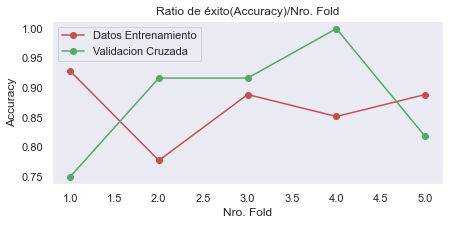

In [27]:
graficar_accuracy_scores(modelo,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

La gráfica exactitud presenta unos picos que al igual que en la gráfica anterior se mueven entre 75% y 95%. Para este modelo se usó un kernel de base radial y se conservó el parámetro C en 100. En este caso el f1-score muestra que hubo una desmejora con respecto al modelo anterior. De los positivos que pedijo el modelo el 86% de estas predicciones estuvieron bien y estas representaban el 89% de los positivos reales.

In [28]:
modelo = SVC(C = 5, kernel = 'poly', random_state=123, degree=3)
modelo.fit(X_train, y_train)

SVC(C=5, kernel='poly', random_state=123)

In [29]:
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [30]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 91.52542372881356%


array([[26,  5],
       [ 0, 28]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.85      1.00      0.92        28

    accuracy                           0.92        59
   macro avg       0.92      0.92      0.92        59
weighted avg       0.93      0.92      0.92        59



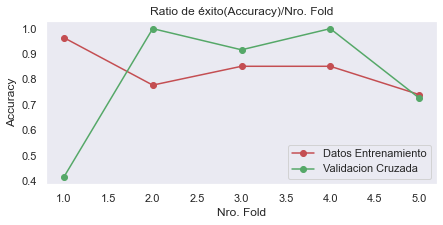

In [31]:
graficar_accuracy_scores(modelo,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

Para este modelo se hizo un cambio en el parámetro C a 5 y se usó un kernel polinomial de grado 3. Este modelo presentó una exactidud más inestable con un gran pico hacia abajo en el primer rango. Aunque la exactitud del modelo es igual a la del primer modelo el f1-score muestra una ligera mejora. De los positivos que pedijo el modelo el 85% de estas predicciones estuvieron bien y representaron el 100% de los positivos reales.

## Redes neuronales

In [44]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'relu',solver='sgd',random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500, random_state=1,
              solver='sgd')

In [45]:
predicciones = classifier.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [46]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 93.22033898305084%


array([[27,  4],
       [ 0, 28]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.88      1.00      0.93        28

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59



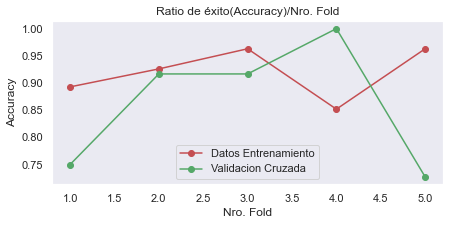

In [47]:
graficar_accuracy_scores(classifier,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

En este modelo de redes neuronales se utilizaron 3 capas de 150, 100 y 50 nodos respectivamente, 500 iteraciones y con función de activación de tipo rectificador. Se nota una ligera mejora con respecto a los modelos de SVM, con un f1-score de 93%. De los positivos que pedijo el modelo el 88% de estas predicciones estuvieron bien y estas representarón el 100% de los positivos reales.

In [48]:
classifier = MLPClassifier(hidden_layer_sizes=(500,500,50), max_iter=100,activation = 'tanh',solver='sgd',random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(500, 500, 50),
              max_iter=100, random_state=1, solver='sgd')

In [49]:
predicciones = classifier.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [50]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 93.22033898305084%


array([[27,  4],
       [ 0, 28]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.88      1.00      0.93        28

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59



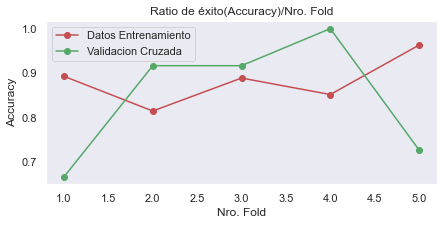

In [51]:
graficar_accuracy_scores(classifier,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

En este modelo se utilizaron 3 capas de 500, 500 y 50 nodos respectivamente, 100 iteraciones y con función de activación de tipo tangente hiperbólica. Aunque con respecto al modelo anterior, los parámetros son muy diferentes, la gráfica de exactitud es muy similar a la del modelo anterior, con una matriz de confusión exactamente igual a la del modelo anterior, f1-score de 93%, precisión de 88% y recall de 100%.

In [72]:
classifier = MLPClassifier(hidden_layer_sizes=(500,400,200,400), max_iter=700,activation = 'identity',solver='sgd',random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(500, 400, 200, 400),
              max_iter=700, random_state=1, solver='sgd')

In [73]:
predicciones = classifier.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 93.22033898305084%


array([[28,  3],
       [ 1, 27]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.96      0.93        28

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



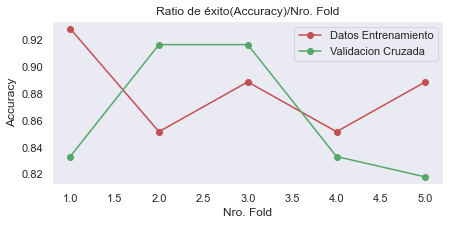

In [75]:
graficar_accuracy_scores(classifier,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

display(confusion_matrix(y_test,predicciones))
class_report=classification_report(y_test,predicciones)
print(class_report)

En este modelo se utilizaron 4 capas de 500, 400, 200 y 400 nodos respectivamente, 700 iteraciones y con función de activación de tipo lineal. La exactitud es mas estable que los modelos anteriores con valores entre 82% y 92%, con un f1-score igual de 93%. Hay una ligera variación en que los positivos que predijo el modelo el 90% de estas predicciones estuvieron bien y estas representaron el 96% de los positivos reales.

# Ventajas y desventajas de SVM

## Ventajas
- Funcionan con problemas de clasificación y de regresión
- No suelen ser afectados por datos ruidosos ni tener overfitting
- Es más fácil de entrenar que las redes neuronales
- Tienen buena reputación

## Desventajas
- Requiere de combinar diferentes kernels y parámetros para llegar a tener un buen modelo
- Puede ser lento de entrenar
- Es un modelo de caja negra, es decir, difícil o improisble de interpretar



# Ventajas y desventajas de redes neuronales

## Ventajas
- Funcionan con problemas de clasificación y de regresión
- Se puede llegar tener modelos precisos
- Pocas suposiciones en la relación entre variables


## Desventajas
- Alto costo computacional
- Tienden a tener overfitting o underfitting
- Modelo de caja negra donde es difícil o imposible interpretar el resultado


# Conclusiones
- Para este ejemplo en específico los modelos de SVM y redes neuronales tuvieron muy buen rendimineto, en algunos casos incluso acertando enencontrar todas las canciones con like de testing.
- Para el caso en especifico que se esta tratando el problema, los modelos generados podrían funcionar muy bien a la hora de recomendar canciones a un usuario.
- El mejor modelo, que se recomendaría usar, es el último, debido a que es el que presentó mas estabilidad en la gráfica de exactitud y mantuvo un rendimiento alto en las diferentes métricas, con un f1-score de 93%.
- Tanto los modelos de SVM como los de redes neuronales son modelos muy dificiles de entrenar, esto debido a la gran cantidad de posibilidades a la hora de ser entrenados, siendo las redes neuronales mucho más complicadas. En este último caso las combinaciones podrían ser infinitas.
- Ambos tipos de modelos son de caja negra, es decir, son dificiles o imposibles de interpretar lo que probablemente no los haría candidatos para casos donde saber como se llega al resultado es muy importante.